In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
X = pd.read_csv('LogisticX.csv')
Y = pd.read_csv('LogisticY.csv')
print(X.shape)
print(Y.shape)

(99, 2)
(99, 1)


In [26]:
x_values = X.values
classes = Y.values

mean = x_values.mean()
std_deviation = x_values.std()
x_values = (x_values-mean)/std_deviation

no_of_samples = x_values.shape[0]

print(x_values.shape)
print(classes.shape)

(99, 2)
(99, 1)


In [51]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [50]:
loss = []
acc = []

W = 2*np.random.random((x_values.shape[1],))
b = 5*np.random.random()


In [54]:
for i in range(1000):
    l,W,b = grad_descent(x_values,classes,W,b,learning_rate=0.1)
    acc.append(get_acc(x_values,classes,W,b))
    loss.append(l)

[0.2219084]


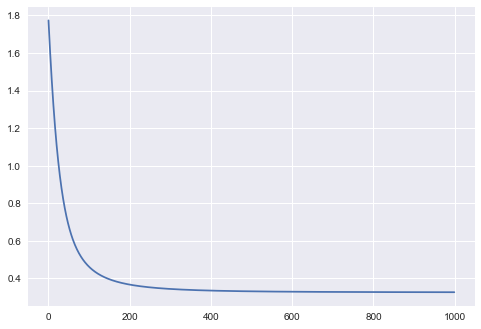

In [56]:
print(b)
plt.plot(loss)

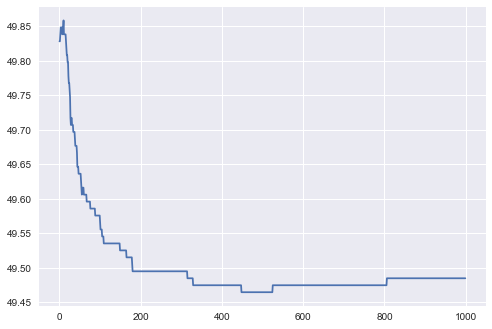

49.484848484848484


In [57]:
plt.plot(acc)
plt.show()
print(acc[-1])


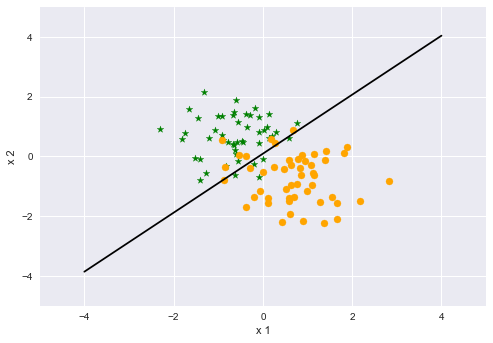

In [84]:
plt.figure(0)

for i in range(x_values.shape[0]):
    if classes[i,0]==1:
        plt.scatter(x_values[i][0],x_values[i][1],c='orange')
    elif classes[i,0]==0:
        plt.scatter(x_values[i][0],x_values[i][1],c='green',marker='*')
        
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel('x 1')
plt.ylabel('x 2')

x = np.linspace(-4,4,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.show()

In [61]:
print(W)
print(b)

[ 2.48506976 -2.5182225 ]
[0.2219084]
